In [23]:
import numpy as np
import pandas as pd
import re
import matplotlib
import seaborn as sns
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from datetime import timedelta

# Importing Data

In [24]:
churn_data = pd.read_csv('labeled_data_with_metrics.csv')
churn_data.columns

Index(['Unnamed: 0', 'distinct_id', 'locationSetting', 'notificationSettings',
       'active_timespan', 'US', 'Facebook', 'Foodie', 'Google', 'Unknown',
       'num_sessions', 'sessions_per_day', 'America/New_York',
       'America/Los_Angeles', 'America/Chicago', 'Asia/Kolkata',
       'America/Denver', 'other_timezone', 'commentAdded', 'commentLength',
       'churned', 'number_ratings', 'SQS', 'avg_session_duration',
       'time_delta_slope', 'session_time_slope', 'time_delta_slope_90',
       'session_time_slope_90'],
      dtype='object')

In [25]:
churn_data = churn_data.set_index('Unnamed: 0')

In [26]:
#Defining Features
X = churn_data[['SQS', 'avg_session_duration', 'Unknown', 'time_delta_slope',
       'session_time_slope','US']]
y = churn_data['churned']

# Decision Tree

In [27]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.833256351039261


Decision Tree accuracies at multiple max depths.

In [28]:
for i in range(5,35):
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier(max_depth=i)

    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    
    # Model Accuracy, how often is the classifier correct?
    print("Accuracy at", i, "max depth:",metrics.accuracy_score(y_test, y_pred))

Accuracy at 5 max depth: 0.846189376443418
Accuracy at 6 max depth: 0.8457274826789838
Accuracy at 7 max depth: 0.8531177829099307
Accuracy at 8 max depth: 0.8614318706697459
Accuracy at 9 max depth: 0.8586605080831409
Accuracy at 10 max depth: 0.8586605080831409
Accuracy at 11 max depth: 0.854041570438799
Accuracy at 12 max depth: 0.851270207852194
Accuracy at 13 max depth: 0.8517321016166282
Accuracy at 14 max depth: 0.8434180138568129
Accuracy at 15 max depth: 0.8369515011547344
Accuracy at 16 max depth: 0.8443418013856813
Accuracy at 17 max depth: 0.8383371824480369
Accuracy at 18 max depth: 0.8392609699769054
Accuracy at 19 max depth: 0.8387990762124712
Accuracy at 20 max depth: 0.8383371824480369
Accuracy at 21 max depth: 0.8351039260969977
Accuracy at 22 max depth: 0.833256351039261
Accuracy at 23 max depth: 0.8341801385681293
Accuracy at 24 max depth: 0.8314087759815243
Accuracy at 25 max depth: 0.836027713625866
Accuracy at 26 max depth: 0.8327944572748268
Accuracy at 27 max d

Final Decision Tree Model using hyperparameters

In [29]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=9)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8572748267898384


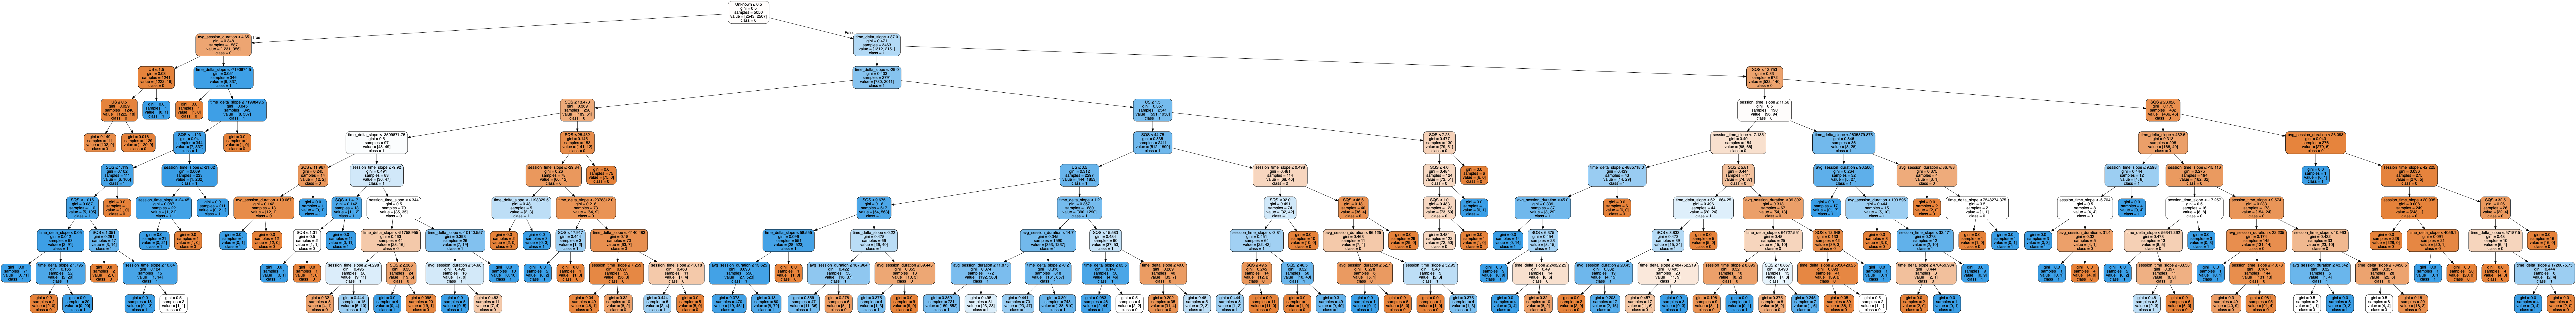

In [30]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('churn.png')
Image(graph.create_png())

In [31]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

avg_session_duration    0.315482
time_delta_slope        0.286645
Unknown                 0.200850
SQS                     0.116787
session_time_slope      0.044808
US                      0.035429
dtype: float64

No handles with labels found to put in legend.


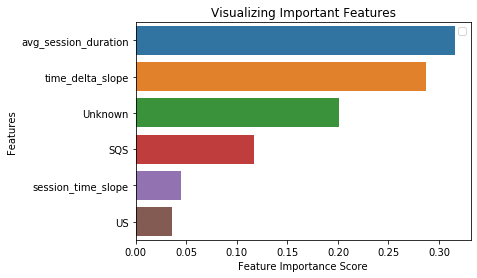

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

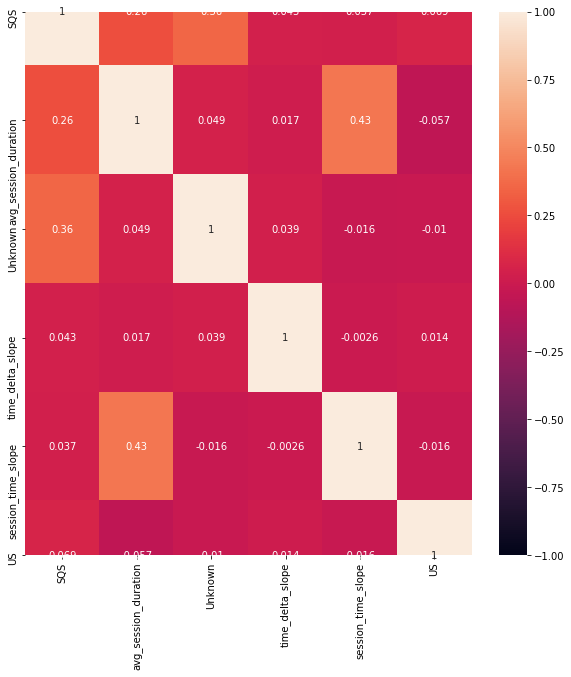

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap((X.astype(float)).corr(), annot=True, vmin=-1, vmax=1);

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[858 205]
 [104 998]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1063
           1       0.83      0.91      0.87      1102

    accuracy                           0.86      2165
   macro avg       0.86      0.86      0.86      2165
weighted avg       0.86      0.86      0.86      2165



# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

for i in range(5,35):
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

    #Create a Gaussian Classifier
    clf=RandomForestClassifier(n_estimators=100, max_depth=i)

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    
    # Model Accuracy, how often is the classifier correct?
    print("Accuracy at", i, "max depth:",metrics.accuracy_score(y_test, y_pred))


Accuracy at 5 max depth: 0.8605080831408776
Accuracy at 6 max depth: 0.8669745958429561
Accuracy at 7 max depth: 0.8706697459584296
Accuracy at 8 max depth: 0.8752886836027713
Accuracy at 9 max depth: 0.8725173210161663
Accuracy at 10 max depth: 0.8734411085450347
Accuracy at 11 max depth: 0.8725173210161663
Accuracy at 12 max depth: 0.8711316397228638
Accuracy at 13 max depth: 0.8697459584295612
Accuracy at 14 max depth: 0.8697459584295612
Accuracy at 15 max depth: 0.8688221709006928
Accuracy at 16 max depth: 0.8665127020785219
Accuracy at 17 max depth: 0.8674364896073903
Accuracy at 18 max depth: 0.8628175519630485
Accuracy at 19 max depth: 0.8683602771362586
Accuracy at 20 max depth: 0.8651270207852194
Accuracy at 21 max depth: 0.8660508083140878
Accuracy at 22 max depth: 0.8642032332563511
Accuracy at 23 max depth: 0.8665127020785219
Accuracy at 24 max depth: 0.8669745958429561
Accuracy at 25 max depth: 0.8637413394919169
Accuracy at 26 max depth: 0.8632794457274827
Accuracy at 27 

Final Random Forest classifier with hyperparameters

In [36]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = RandomForestClassifier(n_estimators=100, max_depth=9)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.871593533487298


In [37]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Unknown                 0.310067
SQS                     0.204013
time_delta_slope        0.174909
avg_session_duration    0.157587
US                      0.080502
session_time_slope      0.072922
dtype: float64

No handles with labels found to put in legend.


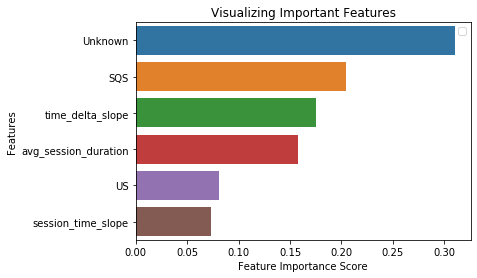

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [39]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 875  188]
 [  90 1012]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1063
           1       0.84      0.92      0.88      1102

    accuracy                           0.87      2165
   macro avg       0.88      0.87      0.87      2165
weighted avg       0.87      0.87      0.87      2165



# XGBoost Binary Classification

In [40]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

xg_classifier = xgb.XGBClassifier(
    learning_rate = .01,
    objective='binary:logistic', 
    max_depth=7,
    min_child_weight=1,
    gamma=0,
    subsample=0.9,
    colsample_bytree=0.7,
    booster='gbtree', 
    n_estimators=400, 
    scale_pos_weight=1,
    reg_alpha=.1,
    nthread=4,
    seed=1)
xg_classifier.fit(X_train, y_train)
preds = xg_classifier.predict(X_test)

In [41]:
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print(accuracy)

0.8734411085450347


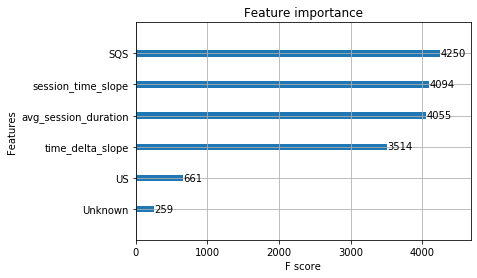

In [42]:
xgb.plot_importance(xg_classifier)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

### Tuning XGBoostClassifier Hyperparameters

In [43]:
from sklearn.model_selection import GridSearchCV

param_test1 = {
 'max_depth':range(3,20,1),
 'min_child_weight':range(1,20,1)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=9, max_depth=9,
 min_child_weight=4, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=1), 
 param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([0.01239781, 0.01256905, 0.01279893, 0.01192904, 0.01194277,
         0.01220927, 0.01139412, 0.01113582, 0.01159029, 0.01173315,
         0.01153321, 0.01151896, 0.0116015 , 0.01188684, 0.01201315,
         0.0114398 , 0.01167898, 0.01212997, 0.01140237, 0.01257682,
         0.01394334, 0.01334949, 0.01337957, 0.01267076, 0.01372538,
         0.01303725, 0.01266432, 0.01359181, 0.01329155, 0.01279945,
         0.013866  , 0.01284261, 0.01292982, 0.01333642, 0.0131094 ,
         0.0134078 , 0.01285148, 0.01253648, 0.01499748, 0.01476693,
         0.01438742, 0.01461878, 0.01522536, 0.01469345, 0.01419468,
         0.01509833, 0.01522164, 0.01513495, 0.01515512, 0.01502419,
         0.01522937, 0.01509027, 0.01552963, 0.01533899, 0.01494422,
         0.01511149, 0.01502743, 0.01733456, 0.01687984, 0.01680808,
         0.01623659, 0.01658745, 0.01667151, 0.01660132, 0.01624432,
         0.0160151 , 0.01642509, 0.01616802, 0.01719723, 0.01614022,
         0.016209

In [44]:
param_test3 = {
 'gamma':[i/100.0 for i in range(0,100)]
}
gsearch3 = GridSearchCV(estimator = xgb.XGBClassifier(learning_rate =0.1, n_estimators=9, max_depth=7,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=1), 
 param_grid = param_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([0.02425532, 0.02880301, 0.02425723, 0.022893  , 0.02349286,
         0.02262597, 0.02337966, 0.02217474, 0.0225832 , 0.02256603,
         0.0214097 , 0.02157283, 0.02102957, 0.02114058, 0.02123008,
         0.02109594, 0.02090797, 0.02130899, 0.02137113, 0.02037611,
         0.02208414, 0.02197523, 0.02148633, 0.02169919, 0.02169108,
         0.02139702, 0.0212347 , 0.02133098, 0.0221252 , 0.02098446,
         0.02193999, 0.0214787 , 0.02126722, 0.02138162, 0.02157168,
         0.02168336, 0.02096486, 0.02177558, 0.02105517, 0.02156157,
         0.02111783, 0.02327724, 0.02124157, 0.02267599, 0.02226024,
         0.02168846, 0.02240009, 0.02175794, 0.02298813, 0.02185845,
         0.02167225, 0.02115273, 0.0216208 , 0.02144346, 0.02172332,
         0.02141724, 0.02257223, 0.02163095, 0.0222836 , 0.02284465,
         0.02233782, 0.02358418, 0.02244616, 0.02229648, 0.02259359,
         0.02242389, 0.02108464, 0.02170739, 0.0217772 , 0.02132616,
         0.021610

In [45]:
param_test4 = {
 'subsample':[i/10.0 for i in range(1,10)],
 'colsample_bytree':[i/10.0 for i in range(1,10)]
}
gsearch4 = GridSearchCV(estimator = xgb.XGBClassifier(learning_rate = .1,
    objective='binary:logistic', 
    max_depth=7,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    booster='gbtree', 
    n_estimators=9, 
    scale_pos_weight=1,
    nthread=4,
    seed=1), 
    param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,y_train)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

({'mean_fit_time': array([0.01384835, 0.01400905, 0.01535606, 0.0156117 , 0.01652598,
         0.01661119, 0.01622357, 0.01822143, 0.0158772 , 0.01303725,
         0.01541786, 0.01595941, 0.01574187, 0.01739626, 0.01728601,
         0.01593075, 0.01615834, 0.01633825, 0.01336155, 0.01452379,
         0.01555328, 0.01580219, 0.01643076, 0.01618524, 0.01632462,
         0.01615582, 0.01634197, 0.01509528, 0.01525621, 0.01696959,
         0.01810594, 0.01777005, 0.01870012, 0.02018299, 0.0181284 ,
         0.01940303, 0.01637483, 0.01671867, 0.01921134, 0.02029958,
         0.02052088, 0.02117567, 0.02012911, 0.0217732 , 0.02112799,
         0.01606793, 0.01787853, 0.01900992, 0.01903081, 0.02096133,
         0.02067037, 0.02108121, 0.02246766, 0.02154126, 0.01584229,
         0.01754818, 0.01911459, 0.01932006, 0.02019124, 0.02119598,
         0.02157416, 0.0214458 , 0.02170277, 0.01660681, 0.01797585,
         0.01893716, 0.0198247 , 0.02034278, 0.02268581, 0.02205319,
         0.022146

In [46]:
param_test5 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch5 = GridSearchCV(estimator = xgb.XGBClassifier(learning_rate = .1,
    objective='binary:logistic', 
    max_depth=7,
    min_child_weight=1,
    gamma=0,
    subsample=0.9,
    colsample_bytree=0.7,
    booster='gbtree', 
    n_estimators=9, 
    scale_pos_weight=1,
    nthread=4,
    seed=1), 
    param_grid = param_test5, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train,y_train)
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

({'mean_fit_time': array([0.02247458, 0.02287483, 0.0203362 , 0.01916828, 0.01647391]),
  'std_fit_time': array([0.00264653, 0.0018741 , 0.00079996, 0.00112152, 0.00076428]),
  'mean_score_time': array([0.00242958, 0.00218005, 0.00198269, 0.0019011 , 0.00203624]),
  'std_score_time': array([2.94311203e-04, 1.00581042e-04, 9.16739744e-05, 1.90860909e-04,
         6.47355573e-05]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'split0_test_score': array([0.86251236, 0.86350148, 0.86547972, 0.85855589, 0.83481701]),
  'split1_test_score': array([0.87636004, 0.87636004, 0.87339268, 0.87636004, 0.86646884]),
  'split2_test_score': array([0.85247525, 0.85148515, 0.85346535, 0.85643564, 0.82772277]),
  'split3_test_score': array([0.8612

# Stacking Models

https://towardsdatascience.com/automate-stacking-in-python-fc3e7834772e

In [47]:
from vecstack import stacking
from sklearn.metrics import accuracy_score

models = [
    DecisionTreeClassifier(max_depth=9),
    
    RandomForestClassifier(n_estimators=100, max_depth=9),
    
    xgb.XGBClassifier(
    learning_rate = .01,
    objective='binary:logistic', 
    max_depth=7,
    min_child_weight=1,
    gamma=0,
    subsample=0.9,
    colsample_bytree=0.7,
    booster='gbtree', 
    n_estimators=400, 
    scale_pos_weight=1,
    reg_alpha=.1,
    nthread=4,
    seed=1)
]

In [48]:
S_train, S_test = stacking(models,                   
   X_train, y_train, X_test,   
   regression=False, 
   mode='oof_pred_bag', 
   needs_proba=False,
   save_dir=None, 
   metric=accuracy_score, 
   n_folds=4, 
   stratified=True,
   shuffle=True,  
   random_state=0,    
   verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [DecisionTreeClassifier]
    fold  0:  [0.85352336]
    fold  1:  [0.84243864]
    fold  2:  [0.85748219]
    fold  3:  [0.84615385]
    ----
    MEAN:     [0.84989951] + [0.00592292]
    FULL:     [0.84990099]

model  1:     [RandomForestClassifier]
    fold  0:  [0.86777514]
    fold  1:  [0.86539984]
    fold  2:  [0.86619161]
    fold  3:  [0.86201427]
    ----
    MEAN:     [0.86534522] + [0.00210470]
    FULL:     [0.86534653]

model  2:     [XGBClassifier]
    fold  0:  [0.87490103]
    fold  1:  [0.86064925]
    fold  2:  [0.87648456]
    fold  3:  [0.85725615]
    ----
    MEAN:     [0.86732275] + [0.00847410]
    FULL:     [0.86732673]



In [49]:
#Use 2nd level model xgb classifier to make predictions form stacked data

xgb_stacking = xgb.XGBClassifier(
    learning_rate = .01,
    objective='binary:logistic', 
    max_depth=7,
    min_child_weight=1,
    gamma=0,
    subsample=0.9,
    colsample_bytree=0.7,
    booster='gbtree', 
    n_estimators=400, 
    scale_pos_weight=1,
    reg_alpha=.1,
    nthread=4,
    seed=1)

xgb_stacking.fit(S_train,y_train)

y_pred = xgb_stacking.predict(S_test)

print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.87205543]
